In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [52]:
data1 = pd.read_csv('./data/5.3_電子業XY篩選train_0518.csv')
data2 = pd.read_csv('./data/5.3_電子業XY篩選test_0518.csv')
train = pd.concat([data1, data2])

In [53]:
train = train.replace([np.inf, -np.inf], np.nan)
train.head()

,公司代碼,上市別,TSE,資料源年,總經理_姓名代碼,總經理_教育程度_代碼,總經理_經理人年資max,總經理_分數,總經理_股數增減比率,總經理_股數增減比率(合計),...,財務長_分數,財務長_股數增減比率,財務長_股數增減比率(合計),獨董_姓名代碼,獨董_教育程度_代碼,獨董_董監事年資max,獨立董事_總分,董監經理人變化_燈號,CRISISCOR,研究發展費用率
0,1333,OTC,M2328,2006,P000041035,3,5.50,1,0.000000,0.000000,...,1,0.0,0.0,P000137096,2,1.83,2,0,0,1.39
1,1333,OTC,M2328,2010,P000013309,4,9.50,1,0.000000,0.000000,...,0,0.0,0.0,NaN,6,NaN,0,0,0,6.29
2,1333,OTC,M2328,2013,P000041035,3,12.50,1,0.006883,0.006883,...,0,0.0,0.0,P000178157&P000132495,3,6.83,3,0,0,2.25
3,1336,OTC,M2328,2006,P000109298,5,19.67,0,0.000000,0.000000,...,1,0.0,0.0,P000109290&P000109292,2,1.83,2,0,0,0.26
4,1336,OTC,M2328,2014,P000109295,4,4.75,1,0.014626,0.014626,...,1,0.0,0.0,P000139118&P000131523,1,7.92,1,0,0,0.00


In [54]:
train = train[['總經理_教育程度_代碼','總經理_經理人年資max','總經理_分數', \
                 '總經理_股數增減比率','總經理_股數增減比率(合計)', \
                 '財務長_教育程度_代碼','財務長_經理人年資max', \
                 '財務長_分數', '財務長_股數增減比率', \
                 '財務長_股數增減比率(合計)', '獨董_教育程度_代碼', \
                 '獨董_董監事年資max', '獨立董事_總分', '董監經理人變化_燈號', \
                 'CRISISCOR', '研究發展費用率']]

In [55]:
train_0 = train.loc[train['CRISISCOR'] == 0]
train_1 = train.loc[train['CRISISCOR'] == 1]

In [56]:
train_0 = train_0.dropna()
train_1 = train_1.fillna(0)
train_X0 = train_0.drop('CRISISCOR', axis=1)
train_X1 = train_1.drop('CRISISCOR', axis=1)

In [57]:
train_Y0 = train_0[['CRISISCOR']]
train_Y1 = train_1[['CRISISCOR']]
len(train_X0)

6137

In [58]:
start = random.randint(0, int(len(train_X0)/2))
start

1718

In [70]:
multiple = 1
end = start + len(train_X1) * multiple
tempTrain_X = pd.concat([train_X0.iloc[start:end], train_X1])
tempTrain_Y = pd.concat([train_Y0.iloc[start:end], train_Y1])

(array([57.,  0., 57.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

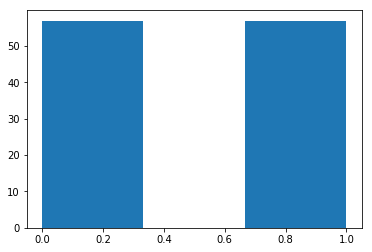

In [71]:
plt.hist(tempTrain_Y['CRISISCOR'], bins=3)

In [80]:
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV 

In [84]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(tempTrain_X, tempTrain_Y['CRISISCOR'])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.500, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.565, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.773, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.478, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.826, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.773, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.565, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.696, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.696, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.727, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [85]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [87]:
clf = svm.SVC(C=10, gamma=0.01, kernel='rbf')
clf.fit(tempTrain_X, tempTrain_Y['CRISISCOR'])

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [88]:
start = random.randint(end+1, len(train_X0)-len(train_X1))
end = start + len(train_X1)
tempTest_X = pd.concat([train_X0.iloc[start:end], train_X1])
tempTest_Y = pd.concat([train_Y0.iloc[start:end], train_Y1])

In [89]:
test_y_predicted = clf.predict(tempTest_X)

In [90]:
accuracy = metrics.accuracy_score(tempTest_Y['CRISISCOR'], test_y_predicted)
accuracy

0.8771929824561403

In [91]:
cnf_matrix = confusion_matrix(tempTest_Y['CRISISCOR'], test_y_predicted)
print(cnf_matrix)

[[43 14]
 [ 0 57]]


In [92]:
report_matrix = classification_report(tempTest_Y['CRISISCOR'], test_y_predicted)
print(report_matrix)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        57
           1       0.80      1.00      0.89        57

    accuracy                           0.88       114
   macro avg       0.90      0.88      0.88       114
weighted avg       0.90      0.88      0.88       114

